<a href="https://colab.research.google.com/github/winkler-eva/CovidClassifierBIOINF/blob/main/CovidClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Covid-Classifier</strong></h1>

In [1]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 10.6MB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 12.8MB 249kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
import fastai
print(fastai.__version__)

2.3.0


In [3]:
import os
from fastai.vision.all import *

<h2>Save images permanently in google drive</h2>

In [ ]:
# data was downloaded from the website kaggle.com
!tar -czvf covid_images.tar.gz covid_data

covid_data/
covid_data/.ipynb_checkpoints/
covid_data/covid/
covid_data/covid/Talaromyces-marneffei-infection-relapse-presenting-as-ost_2020_International-p1-12%3.png
covid_data/covid/2020.03.25.20037721-p27-173.png
covid_data/covid/2020.03.04.20031039-p23-97_2%1.png
covid_data/covid/PIIS0140673620303603%8.png
covid_data/covid/2020.03.12.20034686-p17-91-1.png
covid_data/covid/2020.02.25.20021568-p24-111%5.png
covid_data/covid/2020.03.30.20047985-p9-56%2.png
covid_data/covid/2020.03.20.20037325-p23-121.png
covid_data/covid/2020.02.23.20026856-p17-115%2.png
covid_data/covid/2020.03.18.20038125-p15-54-2.png
covid_data/covid/2020.02.17.20024018-p17-61%0.png
covid_data/covid/2020.02.11.20022053-p12-67%3.png
covid_data/covid/2020.03.04.20031047-p13-84%2.png
covid_data/covid/bmj.m606.full-p4-22%4.png
covid_data/covid/2020.02.10.20021584-p6-52%6.png
covid_data/covid/2020.02.22.20024927-p20-70%3.png
covid_data/covid/2020.03.12.20034686-p17-91-5.png
covid_data/covid/2020.02.22.20024927-p19-68%3.

In [ ]:
!cp -av covid_images.tar.gz /content/drive/My\ Drive/BIOINF

'covid_images.tar.gz' -> '/content/drive/My Drive/BIOINF/covid_images.tar.gz'


In [4]:
!cp /content/drive/My\ Drive/BIOINF/covid_images.tar.gz covid_project/ # replace 'test' with real folder name 

In [7]:
!tar -xf covid_project/covid_images.tar.gz -C covid_project/ # replace 'test' with real folder name 

<h2>Dataloader</h2>

In [16]:
path = Path('covid_project')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [17]:
covid = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [18]:
dls = covid.dataloaders(path)

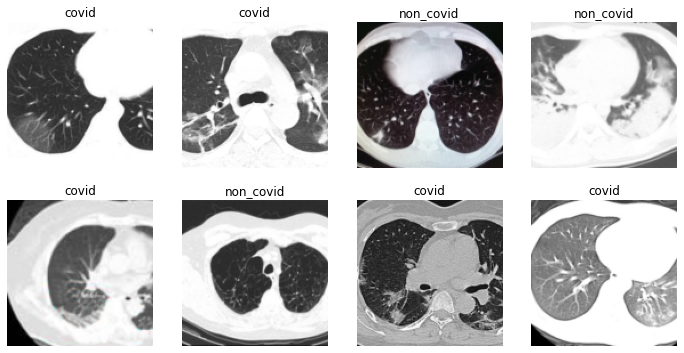

In [22]:
dls.show_batch(max_n=8, nrows=2)

<h2>Train learner</h2>

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.199231,0.556838,0.279570,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.996169,0.604116,0.333333,00:03
1,0.918153,0.623800,0.279570,00:03
2,0.824411,0.642639,0.311828,00:03
3,0.774684,0.656693,0.322581,00:03
4,0.724013,0.729420,0.311828,00:03
5,0.654131,0.690679,0.301075,00:03
6,0.590809,0.677414,0.301075,00:03
7,0.548714,0.648854,0.290323,00:03
8,0.508170,0.633292,0.290323,00:03
9,0.471510,0.648919,0.290323,00:03


<h2>Export learner</h2>

In [26]:
learn.export('covid_classifier.pkl')

In [27]:
# Check if path exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('covid_classifier.pkl')]

In [28]:
# Save covid_classifier.pkl on google drive
# !cp /content/covid_classifier.pkl /content/drive/My\ Drive/BIOINF/covid_classifier.pkl

<h2>Import learner + inference</h2>

In [29]:
# Uncomment line to copy learner from google drive
# !cp /content/drive/My\ Drive/BIOINF/covid_classifier.pkl ./ 

In [30]:
inference = load_learner(path/'covid_classifier.pkl')

In [33]:
# Save test image on google drive
# !cp /content/Testbild.jpeg /content/drive/My\ Drive/BIOINF/
!cp /content/drive/My\ Drive/BIOINF/Testbild.jpeg ./

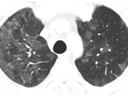

In [34]:
img = Image.open('Testbild.jpeg')
img.to_thumb(128,128)

In [38]:
# inference.predict('Testbild.jpeg')
inference.predict('Testbild_gesund.jpg')

('non_covid', tensor(1), tensor([0.0839, 0.9161]))

In [37]:
inference.dls.vocab

['covid', 'non_covid']

<h2>User Interface</h2>

In [39]:
import ipywidgets as widgets

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [44]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
img = PILImage.create(btn_upload.data[-1])

In [46]:
pred, pred_idx, probs = inference.predict(img)

In [47]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: covid; Probability: 0.9862')

In [48]:
btn_run = widgets.Button(description='Classify Covid')
btn_run

Button(description='Classify Covid', style=ButtonStyle())

In [49]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = inference.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [50]:
btn_upload = widgets.FileUpload()
widgets.VBox([widgets.Label("Select lung CT:"),
             btn_upload, btn_run, out_pl, lbl_pred])